In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [2]:
df_jeux_up = pd.read_csv("../data/details_clean.csv")

In [3]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

# II. Statistiques

<AxesSubplot:>

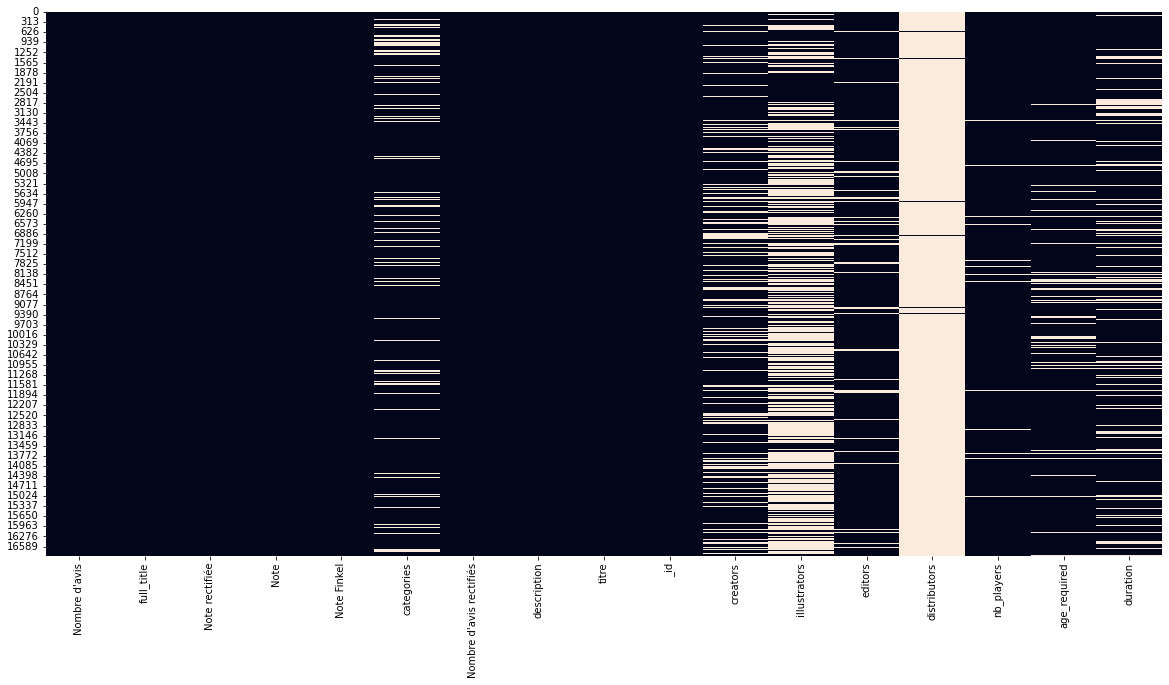

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df_jeux_up.isna(), cbar=False)

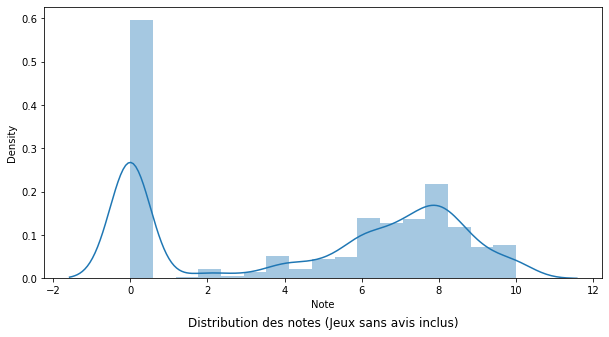

In [5]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up["Note"])
plt.title("Distribution des notes (Jeux sans avis inclus)", y=-0.2)
plt.show()

In [6]:
jeux_avis = df_avis_up["title_id_jeu"].value_counts()

In [7]:
values = jeux_avis.keys().tolist()
counts = jeux_avis.tolist()
value_dict = dict(zip(values, counts))

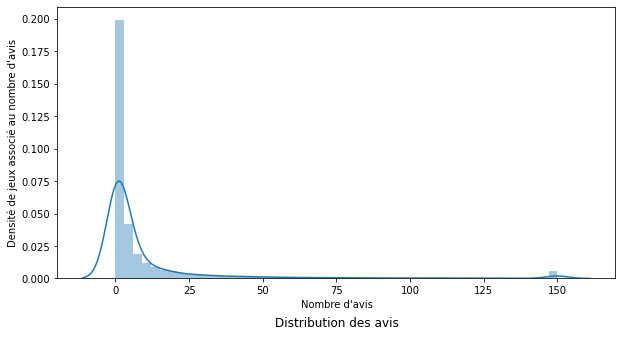

In [8]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up['_id'].map(value_dict).fillna(0))
plt.title("Distribution des avis", y=-0.2)
plt.xlabel("Nombre d'avis")
plt.ylabel("Densité de jeux associé au nombre d'avis")
plt.show()

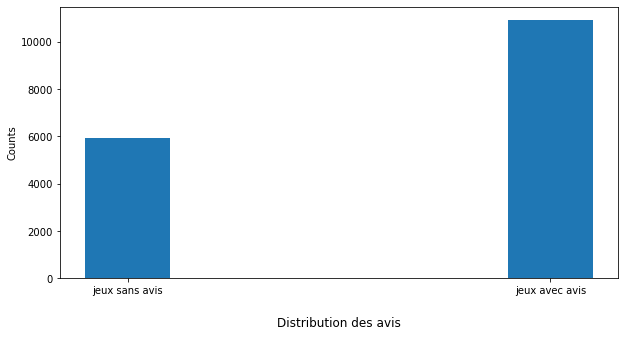

In [9]:
plt.figure(figsize=(10, 5))
data = np.where(df_jeux_up['_id'].isin(values), 1, 0)
_, counts = np.unique(data, return_counts=True)

plt.bar(["jeux sans avis", "jeux avec avis"], counts, width=0.2)
plt.title("Distribution des avis", y=-0.2)
plt.ylabel("Counts")
plt.show()

<Figure size 720x360 with 0 Axes>

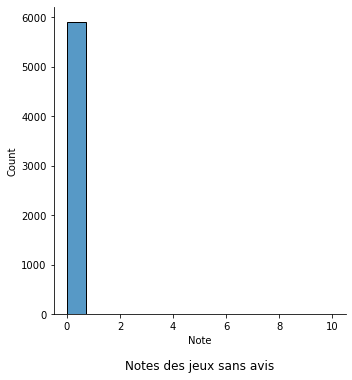

In [10]:
plt.figure(figsize=(10, 5))
sns.displot(df_jeux_up[~df_jeux_up['_id'].isin(values)]["Note"])
plt.title("Notes des jeux sans avis", y=-0.2)
plt.show()

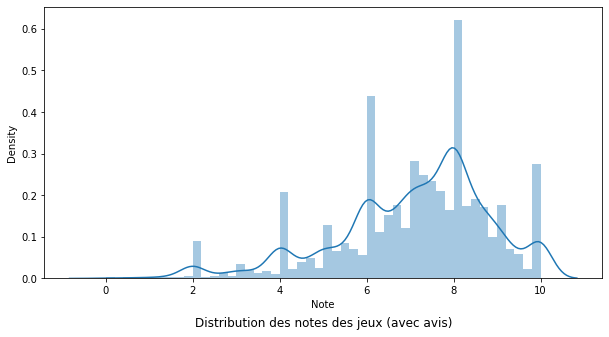

In [11]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up[df_jeux_up['_id'].isin(values)]["Note"])
plt.title("Distribution des notes des jeux (avec avis)", y=-0.2)
plt.show()

In [12]:
notes = df_jeux_up[df_jeux_up['_id'].isin(values)]["Note"]

In [13]:
labels = np.where(notes <= notes.median(), True, False)

In [14]:
df = df_jeux_up[df_jeux_up['_id'].isin(values)]

In [15]:
df.head()

,Nombre d'avis,full_title,Note rectifiée,Note,Note Finkel,categories,Nombre d'avis rectifiés,description,titre,_id,creators,illustrators,editors,distributors,nb_players,age_required,duration
0,19.0,Marvel United (2020),8.40,7.58,8.74,NaN,10.0,\n Marvel United : Unis c...,Marvel United,marvel-united,Eric Lang et Andrea Chiarvesio,Édouard Guiton,CMON Limited,NaN,1-4,14-99,45.0
1,33.0,Mariposas (2020),7.29,7.39,7.68,NaN,17.0,"\n Chaque année, au print...",Mariposas,mariposas,Elizabeth Hargrave,Matt Paquette et Indi Maverick,Gigamic,NaN,2-5,14-99,60.0
2,28.0,Quetzal (2020),7.22,8.18,7.42,Enchères|Aventures dans la jungle|Collection /...,9.0,\n Vous êtes à la tête d’...,Quetzal,quetzal,Alexandre Garcia,Nastya Lehn,Gigamic,NaN,2-5,8-99,45.0
3,4.0,Alien - Kit de Démarrage (2020),0.00,9.00,0.00,NaN,0.0,\n Un Kit de démarrage co...,Alien - Kit de Démarrage,alien-kit-de-demarrage,NaN,NaN,Arkhane Asylum Publishing,NaN,1-99,12-99,NaN
4,72.0,The LOOP (2020),8.79,8.75,9.70,Card-driven|Combinaison|Coopération|Deck build...,24.0,\n Le Dr Foo a créé une t...,The LOOP,the-loop,Maxime Rambourg et Théo Rivière,Simon Caruso,Catch Up Games,NaN,1-4,12-99,60.0


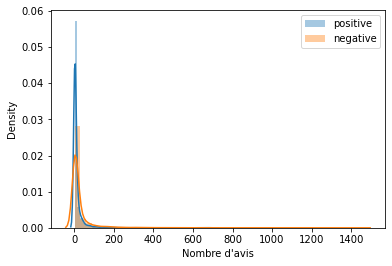

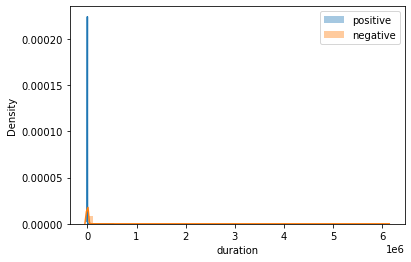

In [17]:
colums = ["Nombre d'avis", "duration"]
for col in colums:
    plt.figure()
    sns.distplot(df[labels][col], label='positive')
    sns.distplot(df[~labels][col], label='negative')
    plt.legend()

<AxesSubplot:>

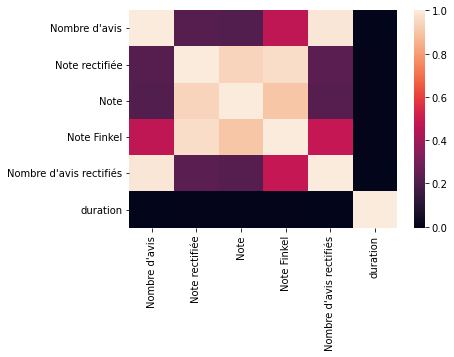

In [18]:
sns.heatmap(df_jeux_up.corr())